## 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")

## 2. Read data

In [3]:
path = './data/train.csv'
titanic_data = pd.read_csv(path)

In [4]:
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
93506,93506,0,2,"Wiese, Bill",male,NaN,0,0,324339,3.35,NaN,S
96464,96464,1,3,"Wilt, Nancy",female,8.0,1,2,438490,12.51,NaN,S
86881,86881,0,3,"Brown, Sandy",female,32.0,0,6,A. 298868,11.08,NaN,S
5644,5644,1,3,"Long, Paula",female,21.0,0,0,NaN,12.11,NaN,S
2314,2314,0,3,"Judy, Michael",male,32.0,3,0,66465,26.85,NaN,S


# Context

A synthetic Titanic dataset based on a real dataset and generated using a CTGAN is given. The __goal__ is to do Exploratory Data Analysis (EDA) on synthetic Titanic dataset. 

__Variable Description__
1. PassengerId: unique id number to each passenger
2. Survived: Passenger survived(1) or died(0)
3. Pclass: Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower)
4. Name: Name
5. Sex: Gender of passenger
6. Age: Age in years
7. SibSp: # of siblings / spouses aboard the Titanic
8. Parch: # of parents / children aboard the Titanic
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

# Data quality assessment

In [5]:
titanic_data.shape

(100000, 12)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


## Missing values

In [7]:
titanic_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

## Outliers

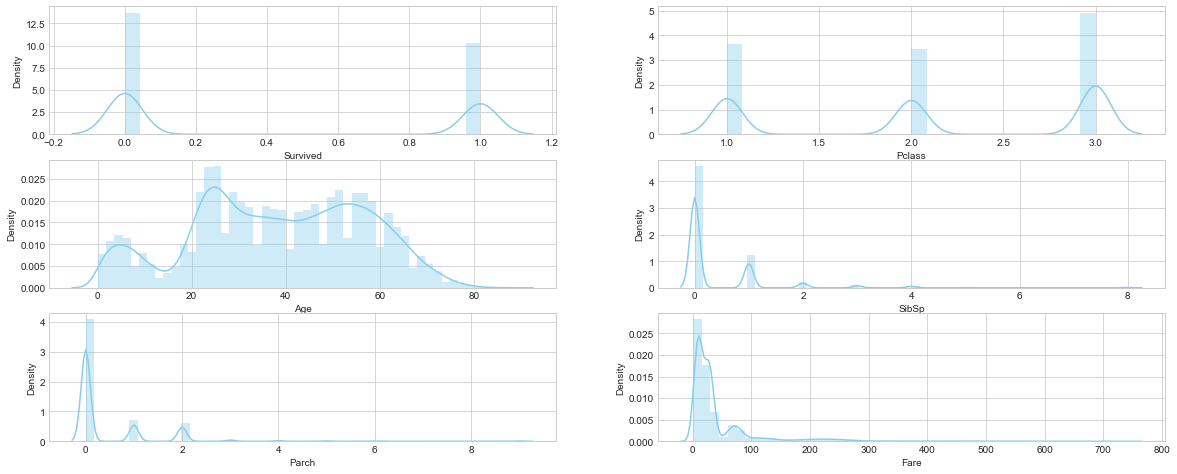

In [8]:
f, axes = plt.subplots(3, 2, figsize=(20, 8))
for ax, feature in zip(axes.flat, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.distplot(titanic_data[feature] , color="skyblue", ax=ax)

<AxesSubplot:ylabel='Age'>

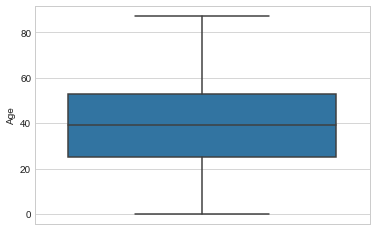

In [9]:
sns.boxplot(y='Age', data=titanic_data)

In [10]:
titanic_data.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [11]:
titanic_data.Ticket.value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

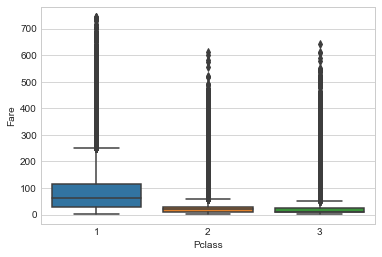

In [12]:
sns.boxplot(y='Fare', x='Pclass', data=titanic_data)

<AxesSubplot:ylabel='Parch'>

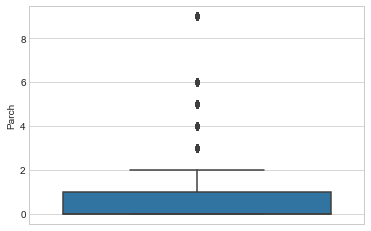

In [13]:
sns.boxplot(y='Parch', data=titanic_data)

<AxesSubplot:ylabel='SibSp'>

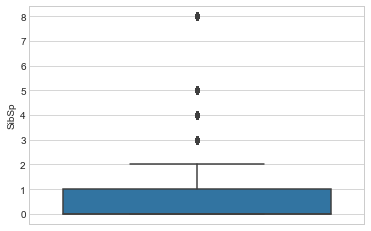

In [14]:
sns.boxplot(y='SibSp', data=titanic_data)

# Data exploration

In [15]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,100000.0,49999.500000,28867.657797,0.00,24999.75,49999.50,74999.25,99999.00
Survived,100000.0,0.427740,0.494753,0.00,0.00,0.00,1.00,1.00
Pclass,100000.0,2.106910,0.837727,1.00,1.00,2.00,3.00,3.00
Age,96708.0,38.355472,18.313556,0.08,25.00,39.00,53.00,87.00
SibSp,100000.0,0.397690,0.862566,0.00,0.00,0.00,1.00,8.00
Parch,100000.0,0.454560,0.950076,0.00,0.00,0.00,1.00,9.00
Fare,99866.0,43.929330,69.588820,0.68,10.04,24.46,33.50,744.66


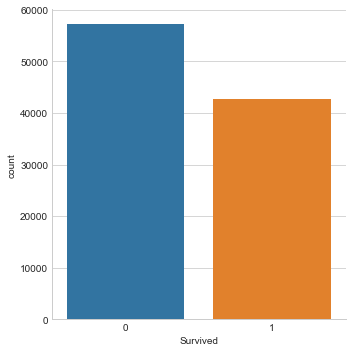

In [16]:
sns.catplot(x='Survived', kind='count', data=titanic_data)
plt.show()

In [17]:
print(1 - titanic_data.Survived.sum()/titanic_data.Survived.count())

0.57226


This means that around 57% of the passengers died. Let's see how the survival rate depends on the gender of the passenger.

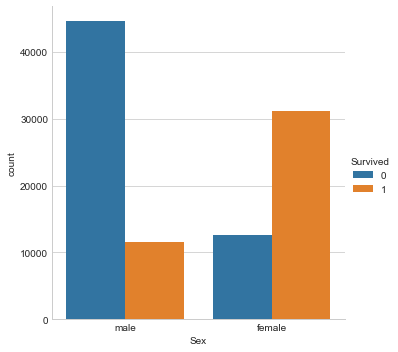

In [18]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=titanic_data)
plt.show()

In [19]:
print(f"{round(titanic_data.Survived[titanic_data.Sex == 'male'].sum() / titanic_data.Survived[titanic_data.Sex == 'male'].count() * 100, 2)}% of men survived")
print(f"{round(titanic_data.Survived[titanic_data.Sex == 'female'].sum() / titanic_data.Survived[titanic_data.Sex == 'female'].count() * 100, 2)}% of women survived")

20.58% of men survived
71.15% of women survived


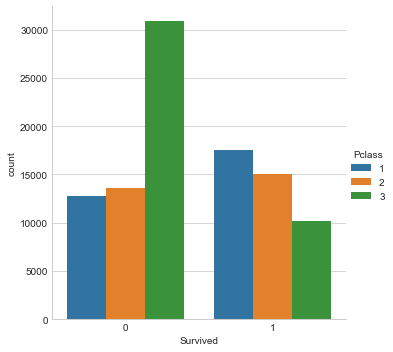

In [20]:
sns.catplot(x='Survived', hue='Pclass', kind='count', data=titanic_data)
plt.show()

In [21]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived, margins=True, normalize=False)

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


What is the dependancy between Pclass and Survived:

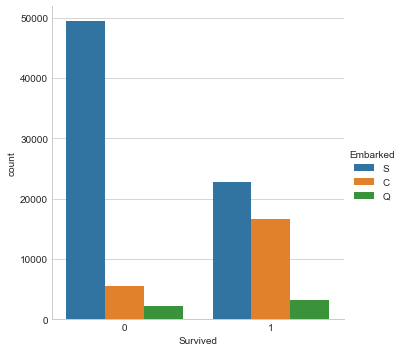

In [22]:
sns.catplot(x='Survived', hue='Embarked', kind='count', data=titanic_data)

Also, it may be important to find the relationship between Pclass and the port where passengers boarded.

In [23]:
pd.crosstab(titanic_data.Pclass, titanic_data.Embarked, margins=True, normalize=False)

Embarked,C,Q,S,All
Pclass,,,,
1,11843,3751,14635,30229
2,6156,844,21609,28609
3,4188,829,35895,40912
All,22187,5424,72139,99750


We see that the largest number of people were in Southampton, and most of them are in the 3rd class. Passengers boarded in Cherbourg is more likely to be survived.

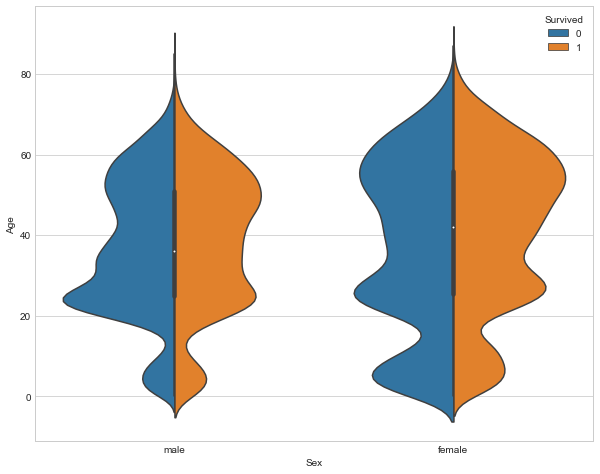

In [24]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, split=True)
plt.show()

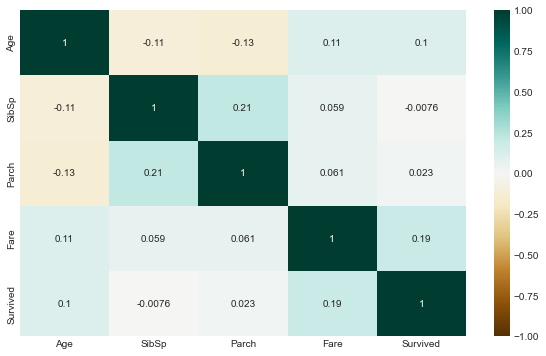

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

SibSp and Parchment correlate. What is the dependance between Parch/SibSP and Survived?

In [26]:
for i, el in enumerate(zip(titanic_data.groupby('Parch')['Survived'].sum().tolist(), titanic_data.groupby('Parch')['Survived'].count().tolist())):
    print(f'Parch = {i}: {el[0]/el[1]}')

Parch = 0: 0.40520805004079413
Parch = 1: 0.5920283164050477
Parch = 2: 0.38474546101815593
Parch = 3: 0.4923702950152594
Parch = 4: 0.28475336322869954
Parch = 5: 0.5709969788519638
Parch = 6: 0.20588235294117646
Parch = 7: 0.4393939393939394


In [27]:
for i, el in enumerate(zip(titanic_data.groupby('SibSp')['Survived'].sum().tolist(), titanic_data.groupby('SibSp')['Survived'].count().tolist())):
    print(f'SibSp = {i}: {el[0]/el[1]}')

SibSp = 0: 0.426842909368691
SibSp = 1: 0.4337483550966697
SibSp = 2: 0.45395625168782067
SibSp = 3: 0.4
SibSp = 4: 0.3758561643835616
SibSp = 5: 0.1893939393939394
SibSp = 6: 0.38513513513513514


Let's create feature 1 and see how survival depends on the presence of relatives on board.

In [28]:
titanic_data['IsAlone'] = titanic_data.Parch + titanic_data.SibSp
titanic_data.IsAlone.loc[titanic_data.IsAlone > 0] = 1
titanic_data.IsAlone.loc[titanic_data.IsAlone == 0] = 0

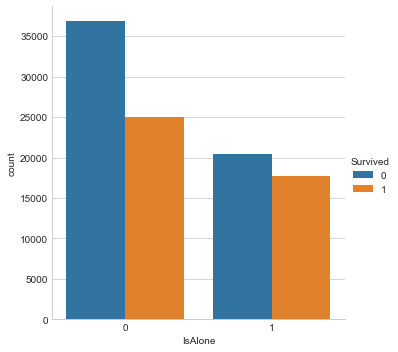

In [29]:
sns.catplot(x='IsAlone', hue='Survived', kind='count', data=titanic_data)

# Summary

Approaches to working with missing values:

1. Missing value in Age can be replaced by the median value.
2. Ticket is likely not to be significant for determining the chances of survival.
3. There are a lot of missing values in the Cabin column and also the location of the cabins on the ship is unknown, so it can be dropped.
4. Missing values in Embarked can be replaced by the mode.
5. Missing values in Fare can be replaced by the mean from the Pclass values.

Approaches to working with outliers:

1. Outliers in Fare column can be raplaced with the mean fare in the Pclass.
2. It may be more useful to create a new feature based on Parch and SibSp, which counts the total number of family members for each passenger and displays the presence of relatives on board.

Important notes:

1. Women are more likely to survive than men.
2. Survival rate decreases with Pclass.

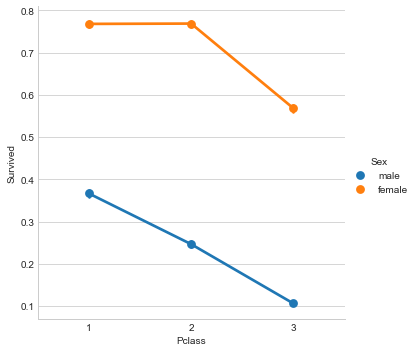

In [30]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=titanic_data)
plt.show()

3. Survival rate is differernt for Embarked. Passenger with Embarked == C is more likely to be survived.
4. The chances of survival are greater if relatives are on board of the ship.
5. Most important features are Sex, Pclass, Embarked.